## 2.10 Nuclear binding energy

In nuclear physics, the semi-empirical mass formula is a formula
for calculating the approximate nuclear binding energy $B$ of an atomic
nucleus with atomic number $Z$ and mass number $A$:
$$
B = a_1 A - a_2 A^{2/3} - a_3 {Z^2\over A^{1/3}}
    - a_4 {(A - 2Z)^2\over A} + {a_5\over A^{1/2}}\,,
$$
where, in units of millions of electron volts, the constants are
$a_1=15.8$, $a_2=18.3$, $a_3=0.714$, $a_4=23.2$, and
$$
a_5 = \left\lbrace\begin{array}{ll}
      0     &\quad\mbox{if $A$ is odd,} \\
      12.0  &\quad\mbox{if $A$ and $Z$ are both even,} \\
      -12.0 &\quad\mbox{if $A$ is even and $Z$ is odd.}
      \end{array}\right.
$$
- Write a program that takes as its input the values of $A$ and $Z$,
  and prints out the binding energy for the corresponding atom.  Use your
  program to find the binding energy of an atom with $A=58$ and $Z=28$.
  (Hint: The correct answer is around $490\,$MeV.)
- Modify your program to print out not the total binding energy $B$,
  but the binding energy per nucleon, which is $B/A$.
- Now modify your program so that it takes as input just a single value
  of the atomic number $Z$ and then goes through all values of $A$ from
  $A=Z$ to $A=3Z$, to find the one that has the largest binding energy per
  nucleon.  This is the most stable nucleus with the given atomic number.
  Have your program print out the value of $A$ for this most stable nucleus
  and the value of the binding energy per nucleon.
- Modify your program again so that, instead of taking $Z$ as input, it
  runs through all values of $Z$ from 1 to 100 and prints out the most
  stable value of $A$ for each one.  At what value of $Z$ does the maximum
  binding energy per nucleon occur?  (The true answer, in real life, is
  $Z=28$, which is nickel.)



要利用半经验公式计算核素的结合能，只需要将质量数A和质子数Z代入半经验公式计算即可。编程时需注意条件语句if、elif、for的用法，确保计算结果正确。


In [ ]:
## answer a and b

import math
Z=int(input('Please input the atomic number Z:'))
A=int(input('Please input the mass number A:'))

a1=15.67
a2=17.23
a3=0.75
a4=93.2

# determine a5 based on the propertitis of A and B
if(A%2==1):
    a5=0
elif(A%2==0 and Z%2==0):
    a5=12.0
elif(A%2==0 and Z%2==1):
    a5=-12.0
    
B=a1*A-a2*(math.pow(A,2/3))-a3*(math.pow(Z,2))/(math.pow(A,1/3))-a4*(math.pow((A-2*Z),2))/A+a5/(math.pow(A,1/2))

print('a) B=',B,'MeV')
print('b) B/A=',B/A,'MeV')
#input('press any key to quit')

In [ ]:
## answer c
import math
Z=int(input('Please input the atomic number Z:'))
a1=15.67
a2=17.23
a3=0.75
a4=93.2
B_max=0
A_bmax=Z
for A in range(Z,10*Z):
    #print("A=", A)
    if(A%2==1):
        a5=0
    elif(A%2==0 and Z%2==0):
        a5=12.0
    elif(A%2==0 and Z%2==1):
        a5=-12.0

    b=a1*A-a2*(math.pow(A,2/3))-a3*(math.pow(Z,2))/(math.pow(A,1/3))-a4*(math.pow((A-2*Z),2))/A+a5/(math.pow(A,1/2))
    if(b>B_max):
        B_max=b
        A_bmax=A
     
print('c) the Max B =',B_max,'MeV', "when A=", A_bmax)
print(' and the Max B/A=',B_max/A_bmax,'MeV')
#input('press any key to quit')

The most stable atom among all atoms is (Z,A,B/A)= ( 24 50 8.532622751365931 )


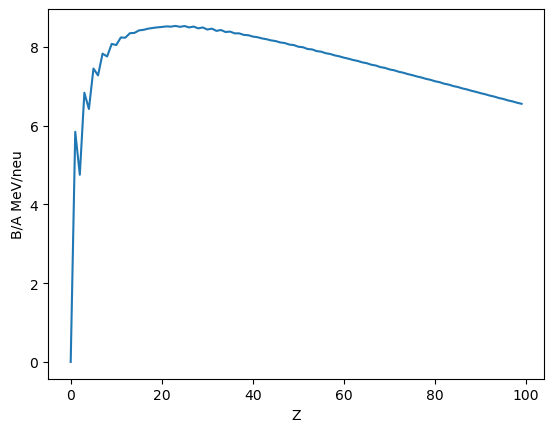

In [29]:
# Answer d
# We introduce a user defined function 
import math
import numpy as np
import pylab as pl
    
def BE(A,Z):
    a1=15.67
    a2=17.23
    a3=0.75
    a4=93.2
    if(A%2==1):
        a5=0
    elif(A%2==0 and Z%2==0):
        a5=12.0
    elif(A%2==0 and Z%2==1):
        a5=-12.0

    b=a1*A-a2*(math.pow(A,2/3))-a3*(math.pow(Z,2))/(math.pow(A,1/3))-a4*(math.pow((A-2*Z),2))/A+a5/(math.pow(A,1/2))
    bpu=b/A
    return bpu

# Max binding energy per nucleon for all nucleons.
Bpu_maxall=0 
A_maxall=0
Z_maxall=0
ZA_Bmaxlist=np.zeros([100,2],float)
for Z in range(1,101):
    Bpu_max=0
    A_bpu_max=0
    
    for A in range(Z,3*Z):
        bpu = BE(A,Z)
        # select Bpu_max for a given Z
        if(bpu>Bpu_max):         
            Bpu_max=bpu
            A_bpu_max=A
                    
        if(Bpu_max>Bpu_maxall):
            Bpu_maxall=Bpu_max
            Z_maxall=Z
            A_maxall=A
    ZA_Bmaxlist[Z-1,:]=[Z,Bpu_max]
            
   # print('For Z=',Z,',the most stable atom is A=',A_maxb,'with B/A=',Bpu_max,'MeV')
print("The most stable atom among all atoms is (Z,A,B/A)=","(",Z_maxall,A_maxall,Bpu_maxall,")") 
pl.plot(ZA_Bmaxlist[:,1])
pl.xlabel("Z")
pl.ylabel("B/A MeV/neu")
pl.show()

#input('press any key to quit')
